<a href="https://colab.research.google.com/github/Nkanga-Pedro/ExplorandoDados/blob/main/K_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
dados = pd.read_table('/content/drive/MyDrive/dataset/microdados_enade_2019.txt',encoding='latin-1', sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (48,49,50,51,52,53,57,58,59,84,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
dados_selecao=dados[['CO_UF_CURSO','CO_REGIAO_CURSO','NT_FG','NU_IDADE','TP_SEXO','QE_I01','QE_I02','QE_I03','QE_I04','QE_I05']]

In [27]:
dados_selecao=dados_selecao.dropna(axis=0)

In [28]:
import gower
import kmodes
from sklearn.cluster import DBSCAN

In [29]:
dados_amostra=dados_selecao.sample(frac=.2)
dados_amostra=dados_amostra.head(100)

In [30]:
dados_amostra['NT_FG'] = dados_amostra['NT_FG'].astype(str)
dados_amostra['NT_FG'] = dados_amostra['NT_FG'].str.replace(',', '.')
dados_amostra['NT_FG'] = pd.to_numeric(dados_amostra['NT_FG'], errors='coerce')

In [31]:
dados_amostra.head(2)

,CO_UF_CURSO,CO_REGIAO_CURSO,NT_FG,NU_IDADE,TP_SEXO,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05
62633,35,3,50.9,35,F,B,A,A,B,B
394194,41,4,76.0,23,M,A,A,A,B,F


In [32]:
distance_matrix = gower.gower_matrix(dados_amostra)

In [38]:
# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.2, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

DBSCAN(eps=0.2, metric='precomputed', min_samples=2)

In [39]:
dados_amostra["cluster"] = dbscan_cluster.labels_

In [40]:
dados_amostra.head(15)

,CO_UF_CURSO,CO_REGIAO_CURSO,NT_FG,NU_IDADE,TP_SEXO,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,cluster
62633,35,3,50.9,35,F,B,A,A,B,B,0
394194,41,4,76.0,23,M,A,A,A,B,F,0
325672,35,3,53.2,23,M,A,D,A,B,B,0
213281,13,1,51.4,28,M,B,D,A,C,D,0
96097,35,3,55.3,29,F,A,A,A,B,B,0
209267,33,3,39.1,43,M,B,B,A,C,C,-1
374826,29,2,34.3,22,F,E,D,A,D,F,0
427779,23,2,41.0,24,F,A,A,A,D,D,0
28048,52,5,37.9,26,F,A,A,A,F,D,0
238845,31,3,33.5,37,F,B,A,A,D,D,0


In [41]:
X=dbscan_cluster.labels_

In [42]:
from sklearn import metrics

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(X)) - (1 if -1 in X else 0)
n_noise_ = list(X).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 11


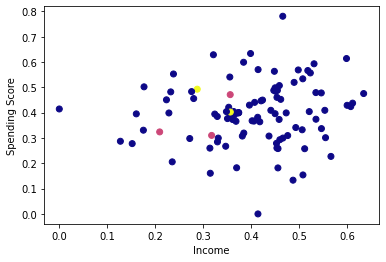

In [58]:
import matplotlib.pyplot as plt
# Plot the clusters
plt.scatter(distance_matrix[:, 0], distance_matrix[:,1], c = X, cmap= "plasma") # plotting the clusters
plt.xlabel("Income")
plt.ylabel("Spending Score") 
plt.show() 